<div style="background-color: #ccffcc; padding: 10px;">
    <h1> Tutorial 5 </h1> 
    <h2> Auto Encoders </h2>
</div>      


# Overview

This Jupyter notebook will walk you through building a simple AutoEcoder model and training it on the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) and applying AutoEncoders to filling in SST data iusing [tensorflow](https://www.tensorflow.org/). PyTorch is a very powerful library written in Python and C++ that facilitates the building and training of neural networks.

This tutorial is was adapted from Clare Bartholemew Presentation. Following Vikram Tiwaris's Kagge [example] (https://www.kaggle.com/code/vikramtiwari/autoencoders-using-tf-keras-mnist/)



## The very basics

If you know nothing about neural networks there is a [toy neural network python code example](https://github.com/cemac/LIFD_ENV_ML_NOTEBOOKS/tree/main/ToyNeuralNetwork) included in the [LIFD ENV ML Notebooks Repository]( https://github.com/cemac/LIFD_ENV_ML_NOTEBOOKS). Creating a 2 layer neural network to illustrate the fundamentals of how Neural Networks work and the equivlent code using the python machine learning library [keras](https://keras.io/). 


## Recommended reading 


* [All you need to know on Neural networks](https://towardsdatascience.com/nns-aynk-c34efe37f15a) 
* [Introduction to Neural Networks](https://victorzhou.com/blog/intro-to-neural-networks/)
* [Auto Encoders](https://towardsdatascience.com/applied-deep-learning-part-3-autoencoders-1c083af4d798)
* 

## Aditional Reading For Earth Science applications

At the end of this notebook, we'll take a breif look at some non-interactive earth science examples, if you wish to have a small walk through the reconstructing SST data example there is a separate notebook with some additional downloads and code requirements. 

* [Reconstructing missing SST data using AutoEncoders](https://gmd.copernicus.org/articles/13/1609/2020/) [(code hosted here)](https://github.com/gher-uliege/DINCAE)
* [Using an AutoEncoder to mimic a GCM](https://brohan.org/ML_GCM/index.html)
* [De-noising radar data]()



<hr>


<div style="background-color: #e6ccff; padding: 10px;">
    
<h1> Machine Learning Theory </h1>
 
## AutoEncoders 
    
AutoEncoders are Feed forward neural networks made of two components:
    
* [Encoder]() translates input data into lower dimensional space. (lower dimensional encoding is refered to as the latent space representation) 
* [Decoder]() tries to reconstruct the original data from the lower dimensional data

    
They can be used for a variety of different applications
    
1. [Dimensionality Reduction](). We have a whole notebook on this [here]()
2. [Image denoising](). Rather than searching for noise a representation of a noiseless image is extracted 
3. [Generation of image and time series data]() 
4. [Annomaly Detection](https://towardsdatascience.com/anomaly-detection-with-autoencoder-b4cdce4866a6)    
    
As you can see there's some obvious applications to Earth Science applications such as de-noising signals and annomaly detection, and there's some less obvious applications that we'll touch upon later such as using Auto Encoders to run a machine learning General Circulation Model
    
References:
    
* 

</div>    
  

<div style="background-color: #cce5ff; padding: 10px;">

<h1> Python </h1>

    
    
## Tensorflow 
    
There are many machine learning python libraries available, [TensorFlow](https://www.tensorflow.org/) a is one such library. If you have GPUs on the machine you are using TensorFlow will automatically use them and run the code even faster!

## Further Reading

* [Running Jupyter Notebooks](https://jupyter.readthedocs.io/en/latest/running.html#running)
* [Tensorflow optimizers](https://www.tutorialspoint.com/tensorflow/tensorflow_optimizers.htm)
    
</div>
    
<hr>



<div style="background-color: #ffffcc; padding: 10px;">
    
<h1> Requirements </h1>

These notebooks should run with the following requirements satisfied

<h2> Python Packages: </h2>

* Python 3
* tensorflow > 2
* numpy 
* matplotlib
* scipy

<h2> Data Requirements</h2>
    
This notebook referes to some data included in the git hub repositroy

    
</div>

**Contents:**

1. [Download MNIST Dataset](#Download-MNIST-Dataset)
2. [Building the Auto Encoder](#Building-the-Auto-Encoder)
3. [Preparing to train](#Preparing-to-train)
4. [Training](Training)


<div style="background-color: #cce5ff; padding: 10px;">

**Import python modules**

</div>

In [1]:
# For readability: disable warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# import modules
# general file system utilites
import os
# Plotting and standard numerical/stats tools
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# Machine Learning Library Tensorflow and specific tools
import tensorflow as tf
from tensorflow.keras import backend as K

2023-01-09 17:25:31.638743: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-09 17:25:31.816881: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-09 17:25:31.816903: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-09 17:25:32.569833: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

<div style="background-color: #cce5ff; padding: 10px;">

Check if GPU's available. This code will run on standard CPU's too just a lots slower.
    
If no GPU's are detected, then pretrained model weights will be used set by the flag
    
```python
train_local=False
```

**If you get a message saying no GPU available but you think there should be this means you have not managed to compile a GPU version of Tensorflow **    
    
</div>

In [7]:
device = "cuda" if tf.config.list_physical_devices('GPU') else "cpu"
if device=='gpu;':
  train_local=True
  GPUs=True  
  print('GPUs found Setting train_local to True')
else:
  train_local=False
  GPUs=False
  print("WARNING: No GPU available. Setting train_local to False")


<div style="background-color: #cce5ff; padding: 10px;">

If you want to override this behaviour and train your own network if you don't mind waiting or if you have GPUS available but don't want to wait 20 mins training your own network later you can the the next cell to:

```python
override_train_local=True
```

</div>

In [19]:
# Set as override_train_local=False to maintain default behaviour for your hardware
override_train_local=False

In [20]:
if override_train_local :
    if GPUs:
        train_local=False  
        print('WARNING SETTING TRAIN LOCAL TO FALSE, PRETRAINED MODEL WILL BE USED')
    else:
        train_local=True
        print('WARNING SETTING TRAIN LOCAL TO TRUE, WILL TRAIN MODEL OVER A LONG TIME ON CPUS')
else: 
    print('Default behaviour')

Default behaviour


# Download MNIST Dataset

<div style="background-color: #cce5ff; padding: 10px;">

As this is based off a kaggle turorial we'll download a `.npz` file from Kaggle. If you wish to see the process of downloading the unprocessed MNIST Dataset please refer to the [GANS notebook]()
    
</div>


In [21]:
%%bash 

wget https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz 
mv mnist.npz data_folder/

--2023-01-09 17:30:49--  https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz
Resolving storage.googleapis.com (storage.googleapis.com)... 2a00:1450:400c:c08::80, 2a00:1450:400c:c06::80, 2a00:1450:400c:c07::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2a00:1450:400c:c08::80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11490434 (11M) [application/octet-stream]
Saving to: ‘mnist.npz’

     0K .......... .......... .......... .......... ..........  0%  245K 46s
    50K .......... .......... .......... .......... ..........  0%  162K 57s
   100K .......... .......... .......... .......... ..........  1% 18.1M 38s
   150K .......... .......... .......... .......... ..........  1% 1.79M 30s
   200K .......... .......... .......... .......... ..........  2% 2.99M 25s
   250K .......... .......... .......... .......... ..........  2% 8.52M 21s
   300K .......... .......... .......... .......... ..........  3% 7.57M 18s
   3

  5100K .......... .......... .......... .......... .......... 45% 30.2M 1s
  5150K .......... .......... .......... .......... .......... 46% 48.6M 1s
  5200K .......... .......... .......... .......... .......... 46% 36.3M 1s
  5250K .......... .......... .......... .......... .......... 47% 48.1M 1s
  5300K .......... .......... .......... .......... .......... 47% 63.3M 1s
  5350K .......... .......... .......... .......... .......... 48% 47.0M 1s
  5400K .......... .......... .......... .......... .......... 48% 33.2M 1s
  5450K .......... .......... .......... .......... .......... 49% 24.5M 1s
  5500K .......... .......... .......... .......... .......... 49% 27.1M 1s
  5550K .......... .......... .......... .......... .......... 49% 44.0M 1s
  5600K .......... .......... .......... .......... .......... 50% 14.8M 1s
  5650K .......... .......... .......... .......... .......... 50%  106M 1s
  5700K .......... .......... .......... .......... .......... 51% 37.6M 1s
  5750K ....

 10500K .......... .......... .......... .......... .......... 94%  180K 0s
 10550K .......... .......... .......... .......... .......... 94% 49.8M 0s
 10600K .......... .......... .......... .......... .......... 94% 41.9M 0s
 10650K .......... .......... .......... .......... .......... 95% 41.5M 0s
 10700K .......... .......... .......... .......... .......... 95% 36.6M 0s
 10750K .......... .......... .......... .......... .......... 96% 42.2M 0s
 10800K .......... .......... .......... .......... .......... 96% 44.4M 0s
 10850K .......... .......... .......... .......... .......... 97% 60.1M 0s
 10900K .......... .......... .......... .......... .......... 97% 63.7M 0s
 10950K .......... .......... .......... .......... .......... 98% 40.6M 0s
 11000K .......... .......... .......... .......... .......... 98% 40.2M 0s
 11050K .......... .......... .......... .......... .......... 98% 39.9M 0s
 11100K .......... .......... .......... .......... .......... 99% 42.6M 0s
 11150K ....

In [22]:
def load_data(path):
    with np.load(path) as f:
        x_train, y_train = f['x_train'], f['y_train']
        x_test, y_test = f['x_test'], f['y_test']
        return (x_train, y_train), (x_test, y_test)

# Building the Auto Encoder

<div style="background-color: #ccffcc; padding: 10px;">
...
    
</div>

In [23]:
# we will start simple with a single fully-connected neural layer as encoder and decoder
# this is the siez of our encoded representations
ENCODING_DIM = 32

# input placeholder
input_img = tf.keras.layers.Input(shape=(784,))

# this is the encoded representation of the input
encoded = tf.keras.layers.Dense(ENCODING_DIM, activation='relu')(input_img)

# this is the loss reconstruction of the input
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its recommendation
autoencoder = tf.keras.models.Model(input_img, decoded)

In [24]:
# let's also create a seprate encoder model
# this mode maps an input to its encoded representation
encoder = tf.keras.models.Model(input_img, encoded)

In [25]:


# as well as decoder model
# create a placeholder for an encoded (32-dimensional) input
encoded_input = tf.keras.layers.Input(shape=(ENCODING_DIM,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# create the decoder model
decoder = tf.keras.models.Model(encoded_input, decoder_layer(encoded_input))



<div style="background-color: #ccffcc; padding: 10px;">

Now we have seen our data, we can start building our neural network!
</div>

<div style="background-color: #ccffcc; padding: 10px;">
Let's confirm how many image samples we have, as well as get a sample of images to show.
<div>


<div style="background-color: #e6ccff; padding: 10px;">
...
    <div>

# Preparing to train

<div style="background-color: #e6ccff; padding: 10px;">
    
N....
</div>

In [26]:
# Now let's train our autoencoder to reconstruct MNIST digits
# first we will configure our model to use a per-pixel binary crossentropy loss, and the Adadelta optimizer
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


In [27]:


# let's prepare our input data. We are using MNIST digits and we are disregrading the labels (since we are only interested in encoding/decoding the input images)
# load the data
(x_train, _), (x_test, _) = load_data('data_folder/mnist.npz')



In [28]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)


(60000, 784)
(10000, 784)


# Learning Rates

In [29]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

<div style="background-color: #e6ccff; padding: 10px;">

...

</div>

<div style="background-color: #cce5ff; padding: 10px;">

    
**There is a link back to here at the end of this section of the tutorial.**
    
...
</div>

<div style="background-color: #ccffcc; padding: 10px;"> 
...
    </div>


<div style="background-color: #e6ccff; padding: 10px;">
    
....
    
</div>    

<div style="background-color: #ccffcc; padding: 10px;">
We're now ready to begin our training loop!
</div>

<div style="background-color: #ccffcc; padding: 10px;">
... 
</div>   

<div style="background-color: #ffcdcc; padding: 10px;">     

...
</div>    

# Training

In [ ]:
# Define the Required Callback Function
class printlearningrate(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        optimizer = self.model.optimizer
        lr = K.eval(optimizer.lr)
        Epoch_count = epoch + 1
        print('\n', "Epoch:", Epoch_count, ', LR: {:.2f}'.format(lr))

printlr = printlearningrate() 

In [30]:
if train_local:
    # now let's train our autoencoder for 50 epochs
    autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, 
                    validation_data=(x_test, x_test),
                    callbacks=[ tf.keras.callbacks.LearningRateScheduler( lambda epoch: 1e-1 * 10 ** (epoch / 50 )),
                                                                          printlr])
    # Trained                 
    trained = True
else:
    print('Train_local set to False loading pretrained')
    try:
        print('...')
    except FileNotFoundError:
         print('grabing pretrained data')

Train_local set to False loading pretrained
...


In [31]:
if train_local:
    if trained:
        autoencoder.save_weights('AE1.ckpt')
        model.save('saved_model/my_model')

        print('save trained')

In [32]:
# now let's train our autoencoder for 50 epochs
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test),callbacks=[
 tf.keras.callbacks.LearningRateScheduler( lambda epoch: 1e-1 * 10 ** (epoch / 50 )),printlr])

Epoch 1/50


2023-01-09 17:31:22.923939: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.
2023-01-09 17:31:23.035216: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


234/235 [============================>.] - ETA: 0s - loss: 0.6745
 Epoch: 1 , LR: 0.10
235/235 [==============================] - 2s 7ms/step - loss: 0.6745 - val_loss: 0.6321 - lr: 0.1000
Epoch 2/50
232/235 [============================>.] - ETA: 0s - loss: 0.5034
 Epoch: 2 , LR: 0.10
235/235 [==============================] - 1s 5ms/step - loss: 0.5021 - val_loss: 0.3675 - lr: 0.1047
Epoch 3/50
231/235 [============================>.] - ETA: 0s - loss: 0.3220
 Epoch: 3 , LR: 0.11
235/235 [==============================] - 1s 6ms/step - loss: 0.3216 - val_loss: 0.2958 - lr: 0.1096
Epoch 4/50
227/235 [===========================>..] - ETA: 0s - loss: 0.2897
 Epoch: 4 , LR: 0.11
235/235 [==============================] - 1s 5ms/step - loss: 0.2895 - val_loss: 0.2832 - lr: 0.1148
Epoch 5/50
227/235 [===========================>..] - ETA: 0s - loss: 0.2817
 Epoch: 5 , LR: 0.12
235/235 [==============================] - 1s 5ms/step - loss: 0.2815 - val_loss: 0.2783 - lr: 0.1202
Epoch 6/50


Epoch 42/50
226/235 [===========================>..] - ETA: 0s - loss: 0.1563
 Epoch: 42 , LR: 0.66
235/235 [==============================] - 1s 5ms/step - loss: 0.1563 - val_loss: 0.1536 - lr: 0.6607
Epoch 43/50
228/235 [============================>.] - ETA: 0s - loss: 0.1537
 Epoch: 43 , LR: 0.69
235/235 [==============================] - 1s 5ms/step - loss: 0.1537 - val_loss: 0.1510 - lr: 0.6918
Epoch 44/50
231/235 [============================>.] - ETA: 0s - loss: 0.1512
 Epoch: 44 , LR: 0.72
235/235 [==============================] - 1s 5ms/step - loss: 0.1512 - val_loss: 0.1485 - lr: 0.7244
Epoch 45/50
227/235 [===========================>..] - ETA: 0s - loss: 0.1488
 Epoch: 45 , LR: 0.76
235/235 [==============================] - 1s 6ms/step - loss: 0.1487 - val_loss: 0.1462 - lr: 0.7586
Epoch 46/50
235/235 [==============================] - ETA: 0s - loss: 0.1463
 Epoch: 46 , LR: 0.79
235/235 [==============================] - 1s 5ms/step - loss: 0.1463 - val_loss: 0.1437 - l

In [33]:
# after 50 epochs the autoencoder seems to reach a stable train/test loss value of about 0.11. We can try to visualize the reconstructed inputs and the encoded representations. We will be using Matplotlib
# encode and decode some digits
# note that we take them from the "test" set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


313/313 [==============================] - 0s 816us/step


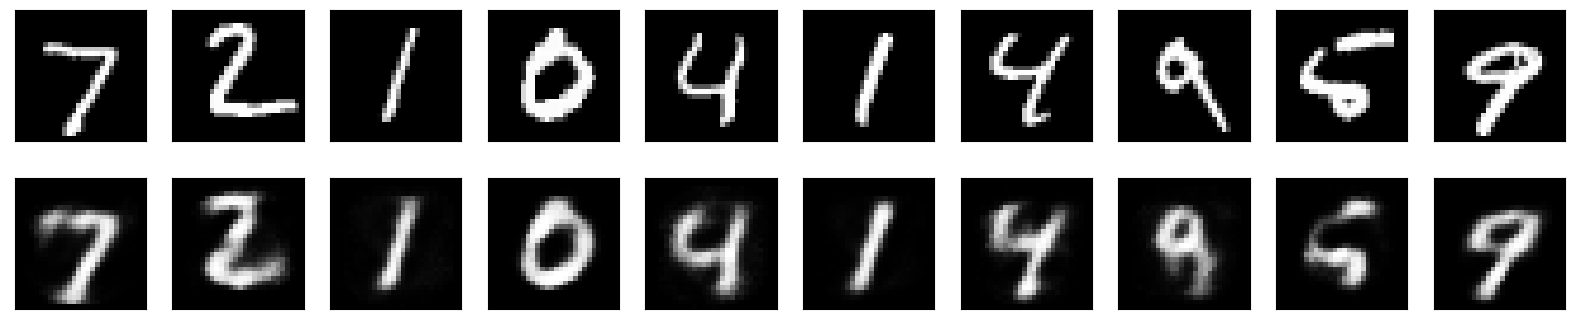

In [34]:


# now using Matplotlib to plot the images
n = 10 # how many images we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

<div style="background-color: #ccffcc; padding: 10px;">


Adding a sparsity constraint on the encoded representations The representations were only constrained by the size of the hidden layer (32). In such a situation, the hidden layer is learning an approximation of PCA. But another way to constain the representation to be compact is to add a sparsity constraint on the activity of the hiddne representations, so fewer units would "fire" at a given time. We can do this by adding activity_regularizer to our Dense layer.

</div>

In [35]:
ENCODING_DIM = 32

input_img = tf.keras.layers.Input(shape=(784,))

# add a dense layer with L1 activity regularizer
encoded = tf.keras.layers.Dense(ENCODING_DIM, activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-5))(input_img)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [21]:
# now let's train this for 100 epochs (with added regularization, the model is less likely to overfit and can be trained longer). The model ends with a train loss of 0.11 and test loss of 0.10. The difference is mostly due to the regularization term being added to the loss during training
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test),callbacks=[
 tf.keras.callbacks.LearningRateScheduler( lambda epoch: 1e-1 * 10 ** (epoch / 50 )),printlr])

Epoch 1/50
233/235 [============================>.] - ETA: 0s - loss: 0.6847
 Epoch: 1 , LR: 0.10
235/235 [==============================] - 6s 24ms/step - loss: 0.6846 - val_loss: 0.6643
Epoch 2/50
233/235 [============================>.] - ETA: 0s - loss: 0.5719
 Epoch: 2 , LR: 0.10
235/235 [==============================] - 3s 12ms/step - loss: 0.5711 - val_loss: 0.4323
Epoch 3/50
235/235 [==============================] - ETA: 0s - loss: 0.3527
 Epoch: 3 , LR: 0.11
235/235 [==============================] - 5s 20ms/step - loss: 0.3527 - val_loss: 0.3096
Epoch 4/50
235/235 [==============================] - ETA: 0s - loss: 0.3001
 Epoch: 4 , LR: 0.11
235/235 [==============================] - 4s 16ms/step - loss: 0.3001 - val_loss: 0.2921
Epoch 5/50
233/235 [============================>.] - ETA: 0s - loss: 0.2899
 Epoch: 5 , LR: 0.12
235/235 [==============================] - 4s 16ms/step - loss: 0.2899 - val_loss: 0.2864
Epoch 6/50
234/235 [============================>.] - ETA: 0

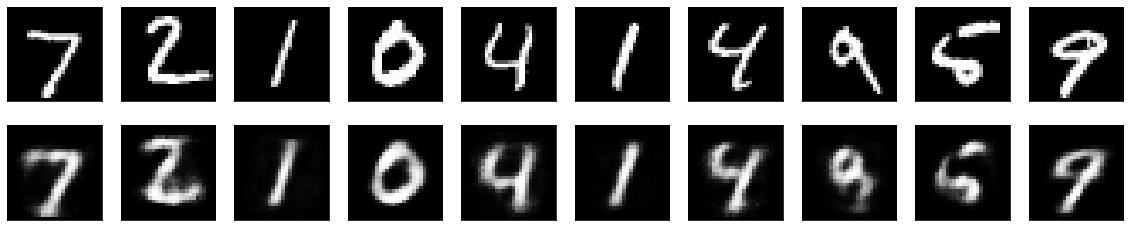

In [22]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
# now using Matplotlib to plot the images
n = 10 # how many images we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()



<div style="background-color: #ccffcc; padding: 10px;">
    The images look pretty similar to the previous model, the only significant difference being the sparsity of the encoded representations. encoded_imgs.mean() yields a value of 3.33 over 10,000 test images. whereas with previous model the same quantity was 7.30. So our new model yields encoded representations that are twice sparser.
</div>


<div style="background-color: #e6ccff; padding: 10px;">
    
Deep autoencoder We do not have to limit ourselves to a single layer as encoder or decoder, we could instead use a stack of layers.
</div>    

In [23]:
input_img = tf.keras.layers.Input(shape=(784,))
encoded = tf.keras.layers.Dense(128, activation='relu')(input_img)
encoded = tf.keras.layers.Dense(64, activation='relu')(encoded)
encoded = tf.keras.layers.Dense(32, activation='relu')(encoded)

decoded = tf.keras.layers.Dense(64, activation='relu')(encoded)
decoded = tf.keras.layers.Dense(128, activation='relu')(decoded)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(decoded)

In [24]:
# let's try this
autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test),callbacks=[
 tf.keras.callbacks.LearningRateScheduler( lambda epoch: 1e-1 * 10 ** (epoch / 50 )),printlr])

Epoch 1/50
233/235 [============================>.] - ETA: 0s - loss: 0.6783
 Epoch: 1 , LR: 0.10
235/235 [==============================] - 6s 25ms/step - loss: 0.6779 - val_loss: 0.6092
Epoch 2/50
233/235 [============================>.] - ETA: 0s - loss: 0.3355
 Epoch: 2 , LR: 0.10
235/235 [==============================] - 8s 35ms/step - loss: 0.3352 - val_loss: 0.2735
Epoch 3/50
234/235 [============================>.] - ETA: 0s - loss: 0.2715
 Epoch: 3 , LR: 0.11
235/235 [==============================] - 6s 24ms/step - loss: 0.2715 - val_loss: 0.2690
Epoch 4/50
234/235 [============================>.] - ETA: 0s - loss: 0.2682
 Epoch: 4 , LR: 0.11
235/235 [==============================] - 6s 27ms/step - loss: 0.2682 - val_loss: 0.2669
Epoch 5/50
235/235 [==============================] - ETA: 0s - loss: 0.2662
 Epoch: 5 , LR: 0.12
235/235 [==============================] - 8s 32ms/step - loss: 0.2662 - val_loss: 0.2651
Epoch 6/50
234/235 [============================>.] - ETA: 0

<div style="background-color: #cce5ff; padding: 10px;">
...
</div>

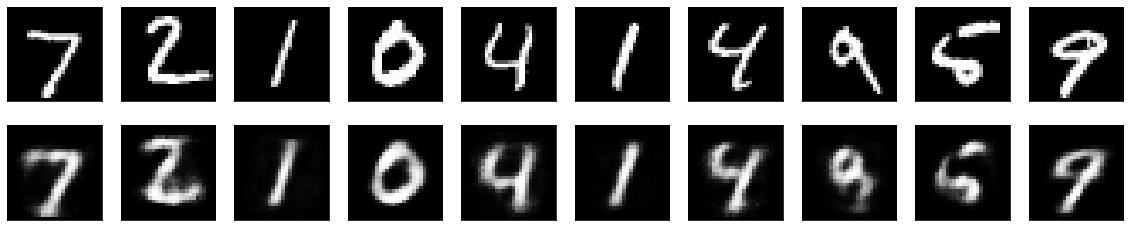

In [25]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
# now using Matplotlib to plot the images
n = 10 # how many images we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

<div style="background-color: #ccffcc; padding: 10px;">


Convolutional autoencoder

Since our inputs are images, it makes sense to use convolutional neural networks (CNNs) as encoders and decoders. In practical settings, autoencoders for images are always convolutional since they perform much better.

This encoder will consist in a stack of Conv2D and MaxPooling2D layers (for spatial down-sampling), while the decoder will consist in a stack of Conv2D and UpSampling2D layers.

</div>    
 


In [26]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')



In [28]:


# to train this model we will with original MNIST digits with shape (samples, 3, 28, 28) and we will just normalize pixel values between 0 and 1
(x_train, _), (x_test, _) = load_data('data_folder/mnist.npz')

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))



In [29]:
mkdir -p tmp/autoencoder

In [36]:

autoencoder.fit(x_train, x_train, epochs=50, batch_size=128, shuffle=True, validation_data=(x_test, x_test),
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder'),
                           tf.keras.callbacks.LearningRateScheduler( lambda epoch: 1e-1 * 10 ** (epoch / 50 )),
                           printlr])

Epoch 1/50
469/469 [==============================] - ETA: 0s - loss: 0.1019
 Epoch: 1 , LR: 0.10
469/469 [==============================] - 138s 294ms/step - loss: 0.1019 - val_loss: 0.1005
Epoch 2/50
469/469 [==============================] - ETA: 0s - loss: 0.1014
 Epoch: 2 , LR: 0.10
469/469 [==============================] - 139s 296ms/step - loss: 0.1014 - val_loss: 0.1002
Epoch 3/50
469/469 [==============================] - ETA: 0s - loss: 0.1011
 Epoch: 3 , LR: 0.11
469/469 [==============================] - 137s 292ms/step - loss: 0.1011 - val_loss: 0.0999
Epoch 4/50
469/469 [==============================] - ETA: 0s - loss: 0.1008
 Epoch: 4 , LR: 0.11
469/469 [==============================] - 144s 308ms/step - loss: 0.1008 - val_loss: 0.0997
Epoch 5/50
469/469 [==============================] - ETA: 0s - loss: 0.1006
 Epoch: 5 , LR: 0.12
469/469 [==============================] - 143s 305ms/step - loss: 0.1006 - val_loss: 0.0995
Epoch 6/50
469/469 [=========================

Epoch 44/50
469/469 [==============================] - ETA: 0s - loss: 0.1015
 Epoch: 44 , LR: 0.72
469/469 [==============================] - 138s 293ms/step - loss: 0.1015 - val_loss: 0.1006
Epoch 45/50
469/469 [==============================] - ETA: 0s - loss: 0.1019
 Epoch: 45 , LR: 0.76
469/469 [==============================] - 142s 302ms/step - loss: 0.1019 - val_loss: 0.1048
Epoch 46/50
469/469 [==============================] - ETA: 0s - loss: 0.1016
 Epoch: 46 , LR: 0.79
469/469 [==============================] - 139s 297ms/step - loss: 0.1016 - val_loss: 0.1033
Epoch 47/50
469/469 [==============================] - ETA: 0s - loss: 0.1021
 Epoch: 47 , LR: 0.83
469/469 [==============================] - 138s 295ms/step - loss: 0.1021 - val_loss: 0.1015
Epoch 48/50
469/469 [==============================] - ETA: 0s - loss: 0.1024
 Epoch: 48 , LR: 0.87
469/469 [==============================] - 138s 294ms/step - loss: 0.1024 - val_loss: 0.1039
Epoch 49/50
469/469 [==============


 
 
<div style="background-color: #ccffcc; padding: 10px;">    



The model converges to a loss of 0.098, significantly better than previous model which is in large part due to the higher entropic capacity of the encoded representations (128 vs 32 previously).


</div>    

<hr>

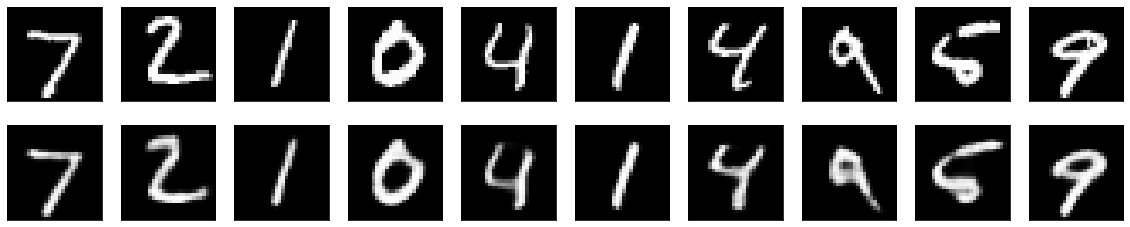

In [37]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [38]:


# # we can also look at the 128-dimensional encoded representations. These representations are 8x4x4, so we reshape them to 4x32 in order to be able to display them as grayscale images
# n = 10
# plt.figure(figsize=(20, 8))
# for i in range(n):
#     ax = plt.subplot(1, n, i + 1)
#     plt.imshow(encoded_imgs[i + 1].reshape(4, 4 * 8).T)
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
# plt.show()



<hr>

<div style="background-color: #ccffcc; padding: 10px;">  

# Application to image denoising

Let's put our convolutional autoencoder to work on an image denoising problem. We will train the autoencoder to map noisy digits images to clean digit images. We will generate synthetic noisy digits by applying a gaussian noise matrix and clip the images between 0 and 1.

</div>

In [39]:
(x_train, _), (x_test, _) = load_data('data_folder/mnist.npz')

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

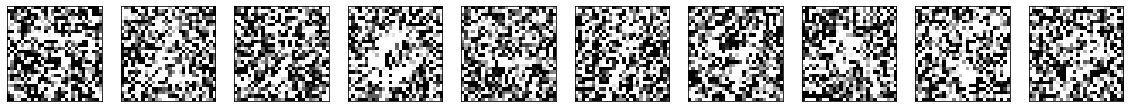

In [40]:
# here's what the noisy digits look like
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [42]:
# Can our autoencoder learn to recover the original digits. We will use a slightly different model with more filters per layer
input_img = tf.keras.layers.Input(shape=(28, 28, 1))

x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# the representation is (7, 7, 32)

x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [43]:


# let's train for 100 epochs
autoencoder.fit(x_train_noisy, x_train, epochs=50, batch_size=128, shuffle=True, 
                validation_data=(x_test_noisy, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/tb', histogram_freq=0, write_graph=False),
                           tf.keras.callbacks.LearningRateScheduler( lambda epoch: 1e-2 * 10 ** (epoch / 50 )),printlr])



Epoch 1/100
469/469 [==============================] - ETA: 0s - loss: 0.3248
 Epoch: 1 , LR: 0.10
469/469 [==============================] - 97s 208ms/step - loss: 0.3248 - val_loss: 0.2596
Epoch 2/100
469/469 [==============================] - ETA: 0s - loss: 0.2420
 Epoch: 2 , LR: 0.10
469/469 [==============================] - 97s 207ms/step - loss: 0.2420 - val_loss: 0.2202
Epoch 3/100
469/469 [==============================] - ETA: 0s - loss: 0.2161
 Epoch: 3 , LR: 0.11
469/469 [==============================] - 96s 205ms/step - loss: 0.2161 - val_loss: 0.2094
Epoch 4/100
469/469 [==============================] - ETA: 0s - loss: 0.2076
 Epoch: 4 , LR: 0.11
469/469 [==============================] - 96s 205ms/step - loss: 0.2076 - val_loss: 0.2053
Epoch 5/100
469/469 [==============================] - ETA: 0s - loss: 0.2024
 Epoch: 5 , LR: 0.12
469/469 [==============================] - 98s 209ms/step - loss: 0.2024 - val_loss: 0.1975
Epoch 6/100
469/469 [========================

KeyboardInterrupt: 

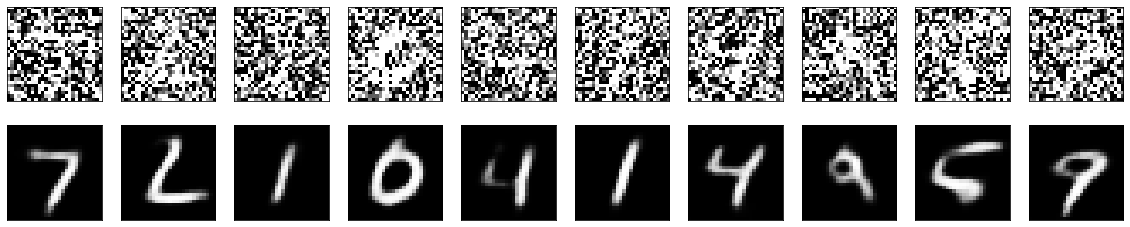

In [44]:
# Let's see how it did
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
